<a href="https://colab.research.google.com/github/Priyo-prog/Machine-Learning/blob/main/Fashion%20MNIST/fashion_mnist_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion Problem Statement**

Categorize the images in different classes of attires.

## **Import the Dataset**

In [1]:
# Mount the google colab drive
from google.colab import drive
drive.mount('/content/drive')
import random

Mounted at /content/drive


In [2]:
file_path_train = '/content/drive/MyDrive/Data Science/Machine Learning/Fashion MNIST/fashion-mnist_train.csv'
file_path_test = '/content/drive/MyDrive/Data Science/Machine Learning/Fashion MNIST/fashion-mnist_test.csv'

In [3]:
%cd /content/drive/MyDrive/Data Science/Machine Learning/Fashion MNIST

/content/drive/MyDrive/Data Science/Machine Learning/Fashion MNIST


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
fashion_train_df = pd.read_csv(file_path_train, sep=',')

In [6]:
fashion_test_df = pd.read_csv(file_path_test, sep=',')

## **Visualization of Dataset**

In [7]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_train_df.shape, fashion_test_df.shape

((60000, 785), (10000, 785))

In [9]:
# Convert training and testing set with array
training = np.array(fashion_train_df, dtype="float32")

In [10]:
testing = np.array(fashion_test_df, dtype="float32")

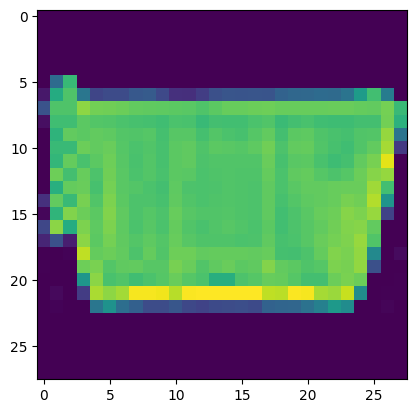

In [11]:
# show random images
i = random.randint(1,60000)
# show the image in plt.imshow (row number 12 and all columns)
plt.imshow(training[i, 1:].reshape(28,28))

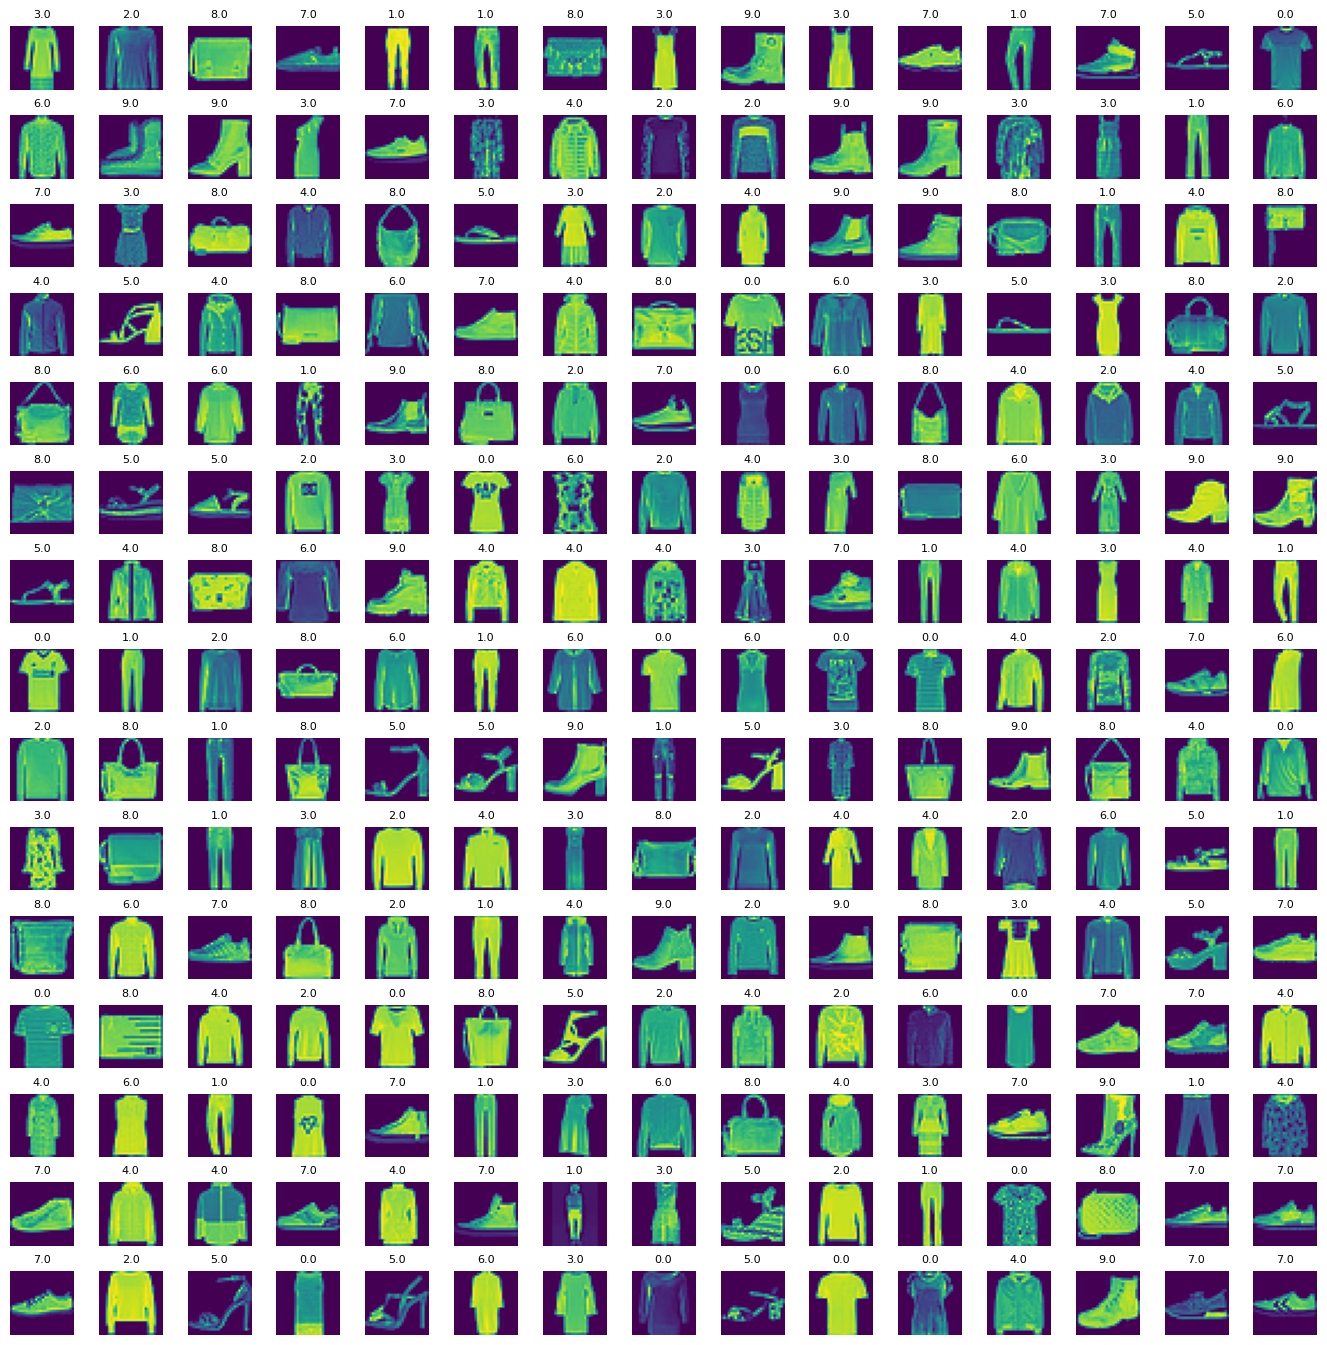

In [12]:
# Let's view some more images in a grid format
W_grid = 15
L_grid = 15

fig, axes = plt.subplots(L_grid, W_grid, figsize=(17,17))

axes = axes.ravel() # flatten the 15 x 15 matrix in 225 array

# Get the length of the training set
n_training = len(training)

for i in np.arange(0, W_grid * L_grid):

  index = np.random.randint(0, n_training)

  axes[i].imshow(training[index, 1:].reshape(28,28))
  axes[i].set_title(training[index,0], fontsize=8)
  axes[i].axis("off")

plt.subplots_adjust(hspace=0.4)

## Train the Model

In [13]:
# Select all the columns except the 1st column and normalize the data
X_train = training[:, 1:]/255 
y_train = training[:, 0]

In [14]:
# Testing data
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [15]:
# Create the Validation Dataset to understand
# whether the data is generalized or not
from sklearn.model_selection import train_test_split

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
# Reshape the data
X_train = X_train.reshape(X_train.shape[0], *(28,28,1))
X_test = X_test.reshape(X_test.shape[0], *(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28,28,1))

In [17]:
X_train.shape, X_test.shape, X_validate.shape

((48000, 28, 28, 1), (10000, 28, 28, 1), (12000, 28, 28, 1))